<a href="https://colab.research.google.com/github/2loopoff/MLHomeworks/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BA%D0%B0_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Consider the following toy dataset:

In [ ]:
true_function = lambda x: 3.25 * x - 1.47
noize_function = lambda x: (
    np.random.normal(size=len(x)) * 4. +
    np.where(
        x < 15,
        0.,
        -60 + np.random.normal(size=len(x)) * 10
    ) * (np.random.uniform(size=len(x)) < 0.4).astype(int)
)
limits = (-4., 20.)

def generate_dataset(N=300):
  x = np.random.uniform(*limits, size=N)
  y = true_function(x)+ noize_function(x)

  return x[:,None], y

X, y = generate_dataset(50)



In [ ]:
y[:4]
# print(y[:4])

array([36.15265866, 38.63940484,  0.68303518, 43.95910503])

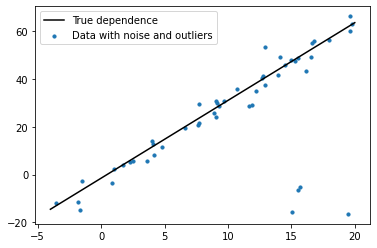

In [ ]:
x = np.linspace(*limits, 11)
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend();

## Task 1

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_expand = PolynomialFeatures(1, include_bias=False)
poly_expand.fit_transform(np.arange(1)[:,None])

X_expanded = np.concatenate([
    poly_expand.transform(X), np.ones(shape=(len(X), 1))#Чтобы склеить преобразованные фичи.
], axis=1)


In [ ]:
print(X[:3])
print(X_expanded[:5])

[[16.80959598]
 [19.42995354]
 [ 7.74321961]]
[[16.80959598  1.        ]
 [19.42995354  1.        ]
 [ 7.74321961  1.        ]
 [ 1.69837893  1.        ]
 [ 0.84544777  1.        ]]


In [ ]:
# Initialize the model parameters with zeros
w = np.zeros(dtype=float, shape=X_expanded.shape[1])

loss_values = [] # a list to keep track of how the loss value changes
learning_rate = 0.01


In [ ]:
print(w)
gradient = 2.0/len(X_expanded)*X_expanded.T @ (X_expanded @ w - y)/(2*np.sqrt((X_expanded @ w - y).T @ (X_expanded @ w - y) ))
print(gradient)

[0. 0.]
[-1.46197589 -0.10469616]


In [ ]:
(abs(X_expanded @ w - y)).mean()
np.sqrt((X_expanded @ w - y).T @ (X_expanded @ w - y) )
w-=learning_rate * gradient
print(w)
gradient = 1.0/len(X_expanded)*X_expanded.T @ (X_expanded @ w - y)/(np.sqrt((X_expanded @ w - y).T @ (X_expanded @ w - y) ))
print('grad = ',gradient)
assert gradient.shape == w.shape
assert (
      ((abs(X_expanded @ w - y)).mean() > 
      (abs(X_expanded @ (w - 1.e-6 * gradient) - y)).mean()
  ))

[1.46197589 0.10469616]
grad =  [-1.00499048 -0.07227715]


In [ ]:
# Training loop
for _ in range(1000):
  # Your turn: calculate the gradient of MSE with respect to w:
  gradient = 1.0/len(X_expanded)*X_expanded.T @ (X_expanded @ w - y)/(np.sqrt((X_expanded @ w - y).T @ (X_expanded @ w - y) ))
  print('grad = ',gradient)
  # Automatic checks
  assert gradient.shape == w.shape
  assert (
      ((abs(X_expanded @ w - y)).mean() > 
      (abs(X_expanded @ (w - 1.e-6 * gradient) - y)).mean()
  ))

  # Gradient descent step
  w -= learning_rate * gradient

  # Calculate and record the new loss value
  loss_values.append(
      (abs(X_expanded @ w - y)).mean()
  )

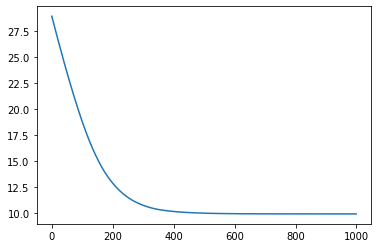

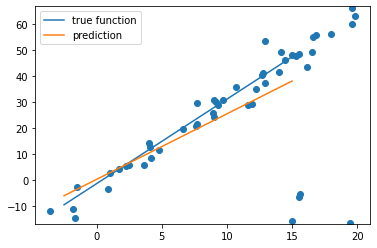

In [ ]:
# Plotting the evolution of loss values
plt.plot(loss_values);
plt.show()


# Plotting the solution
x = np.linspace(-2.5, 15, 101)
x_expanded = np.concatenate([
    poly_expand.transform(x[:,None]),
    np.ones(shape=(len(x), 1))
], axis=1)
plt.plot(x, true_function(x), label='true function')
plt.scatter(X, y);
plt.plot(x,
         x_expanded @ w, label='prediction')
plt.ylim(y.min() - 0.5, y.max() + 0.5)
plt.legend();

In [ ]:
print(loss_values[:5])

[313.4606295823427, 152.91327174383136, 74.8909360190667, 36.973675233837774, 18.546467346065192]


Implement a linear model $\hat y(x|w) = w_1\cdot x + w_0$ with MAE loss:
$$\text{MAE}(w) = \frac{1}{N}\sum_{i=1}^N\left|y_i - \hat y(x_i|w)\right|,$$
using gradient descent optimization in `numpy`.

*Hint: introduce a constant feature to account for the bias term to make the formulas simpler.*

Plot the learning curve and the final fit. Also, fit the same data with `sklearn`'s `LinearRegression`, and compare the two fits on the same plot. What do you observe? Write a short comment.